# Random Forest Regression with Python

#### import

In [38]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#### โหลดข้อมูล

In [39]:
print(data())

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


In [40]:
df = data('cancer')
print(df.head())

   inst  time  status  age  ...  ph.karno  pat.karno  meal.cal  wt.loss
1   3.0   306       2   74  ...      90.0      100.0    1175.0      NaN
2   3.0   455       2   68  ...      90.0       90.0    1225.0     15.0
3   3.0  1010       1   56  ...      90.0       90.0       NaN     15.0
4   5.0   210       2   57  ...      90.0       60.0    1150.0     11.0
5   1.0   883       2   60  ...     100.0       90.0       NaN      0.0

[5 rows x 10 columns]


#### ตรวจสอบข้อมูลที่มี missing values และลบทิ้ง

In [41]:
df = df.dropna()
print(df.head())

   inst  time  status  age  ...  ph.karno  pat.karno  meal.cal  wt.loss
2   3.0   455       2   68  ...      90.0       90.0    1225.0     15.0
4   5.0   210       2   57  ...      90.0       60.0    1150.0     11.0
6  12.0  1022       1   74  ...      50.0       80.0     513.0      0.0
7   7.0   310       2   68  ...      70.0       60.0     384.0     10.0
8  11.0   361       2   71  ...      60.0       80.0     538.0      1.0

[5 rows x 10 columns]


#### เลือกตัวแปรอิสระ (X) และตัวแปรตาม (y)

In [42]:
X = df[['time','status','sex','ph.ecog','pat.karno','meal.cal','wt.loss']]
y = df['age']

#### แบ่งข้อมูลเป็นชุดการฝึกและทดสอบ

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

#### สร้างและฝึกโมเดล RandomForestRegressor

In [44]:
h = RandomForestRegressor(n_estimators=100, random_state=1)
h.fit(x_train,y_train)


RandomForestRegressor(random_state=1)

#### ทำนายผลตัวทดสอบ

In [45]:
y_pred = h.predict(x_test)

#### คำนวณ Mean Squared Error

In [46]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 67.87276274509804


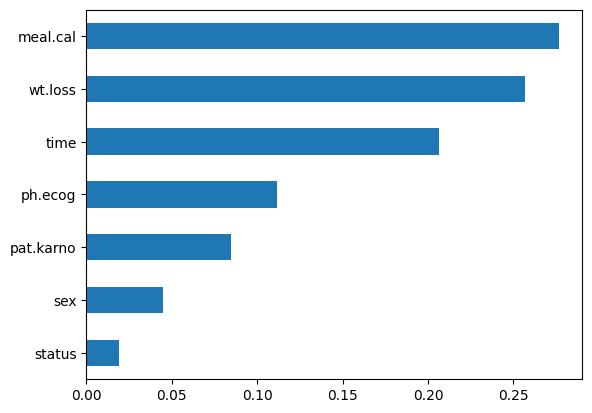

In [54]:
model_ranks = pd.Series(h.feature_importances_, index=x_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')